# Audio Processing

## The Pianist

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

from typing import TypeAlias

Signal: TypeAlias = np.ndarray[np.float64] # type: ignore
TimePeriod: TypeAlias = np.ndarray[np.bool_] # type: ignore

In [2]:
# Single tone generation
def tone(t: np.ndarray, t_i: float, T_i: float, f_i: float) -> Signal:
    signal: Signal  = np.zeros(t.shape)
    range_: TimePeriod = ((t >= t_i) & (t <= T_i))
    signal[range_] = np.sin(2 * np.pi * f_i * t)[range_]
    return signal

# Song generation
def song(N: int, t: np.ndarray, t_i: list[float], T_i: list[float], f_i: list[float], F_i: list[float]) -> Signal:
    assert len(t_i) == len(T_i) == len(f_i) == len(F_i) == N, "Invalid input"
    signal: Signal  = np.zeros(t.shape)
    for i in range(N):
        tone1 = tone(t, t_i[i], T_i[i], f_i[i])
        tone2 = tone(t, t_i[i], T_i[i], F_i[i])
        signal += tone1 + tone2
    return signal

In [3]:
t: np.ndarray = np. linspace(0, 3, 12 * 1024)

In [4]:
x_1 = tone(t, 0, 1.5, 261.63)

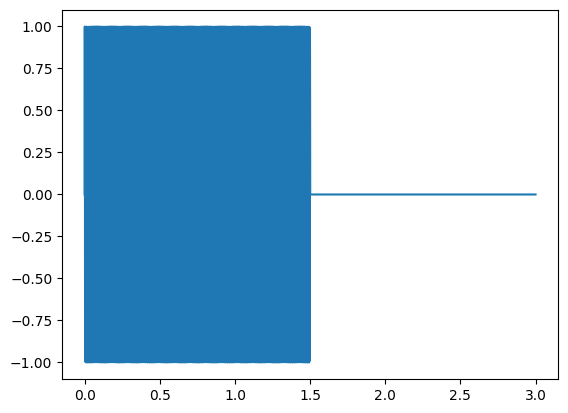

In [5]:
plt.plot(t, x_1)
sd.play(x_1, 3 * 1024)

In [6]:
N: int = 7
t_i: list[float] = [0.00, 0.33, 0.81, 1.14, 1.62, 1.95, 2.43]
T_i: list[float] = [0.21, 0.69, 1.02, 1.50, 1.83, 2.31, 2.90]
f_i: list[float] = [0, 0, 293.66, 293.66, 329.63, 329.63, 293.66]
F_i: list[float] = [196, 196, 0, 0, 0, 0, 0]

x: Signal = song(N, t, t_i, T_i, f_i, F_i)


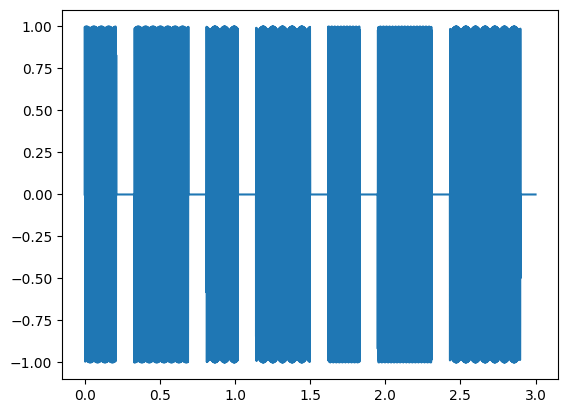

In [7]:
plt.plot(t, x)
sd.play(x, 6 * 1024)

---